# Importing Modules

In [1]:
import torch
import torchinfo
import torchvision

import gymnasium as gym
import matplotlib.pyplot as plt

In [2]:
import models

In [3]:
import importlib
importlib.reload(models)

<module 'models' from 'c:\\Users\\josep\\Code\\School\\RL\\Project\\src\\models\\__init__.py'>

# DQN

## Configure

In [ ]:
device = torch.device(
    "cuda" if torch.cuda.is_available() else
    "mps" if torch.backends.mps.is_available() else
    "cpu"
)


In [ ]:
GRID_SEARCH = True

In [12]:
def save_model(agent, path: str):
    """Save DQN model weights"""
    torch.save({
        'policy_net_state_dict': agent.policy_net.state_dict(),
        'target_net_state_dict': agent.target_net.state_dict(),
        'optimizer_state_dict': agent.optimizer.state_dict(),
    }, path)
    print(f"Model saved to {path}")

def load_model(agent, path: str):
    """Load DQN model weights"""
    checkpoint = torch.load(path)
    agent.policy_net.load_state_dict(checkpoint['policy_net_state_dict'])
    agent.target_net.load_state_dict(checkpoint['target_net_state_dict'])
    agent.optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    print(f"Model loaded from {path}")
    return agent

## Hyperparameters search

In [13]:
if GRID_SEARCH:# Initialize the tuner
    tuner = models.RayTuneDQN(num_samples=50, max_episodes=1000)

    # Run hyperparameter search
    analysis = tuner.run_hyperparameter_search()

    # Print best configuration
    tuner.print_best_config(analysis)

2024-12-08 12:10:01,248	WARNING trial.py:647 -- The path to the trial log directory is too long (max length: 260. Consider using `trial_dirname_creator` to shorten the path. Path: C:\Users\josep\AppData\Local\Temp\ray\session_2024-12-08_12-09-55_219074_17352\artifacts\2024-12-08_12-10-01\_trainable_2024-12-08_12-10-01\driver_artifacts\_trainable_4270e_00000_0_batch_size=64,epsilon_decay=1000,epsilon_min=0.0732,epsilon_start=0.9333,gamma=0.9818,learning_rate=0.000_2024-12-08_12-10-01
2024-12-08 12:10:01,253	WARNING trial.py:647 -- The path to the trial log directory is too long (max length: 260. Consider using `trial_dirname_creator` to shorten the path. Path: C:\Users\josep\AppData\Local\Temp\ray\session_2024-12-08_12-09-55_219074_17352\artifacts\2024-12-08_12-10-01\_trainable_2024-12-08_12-10-01\driver_artifacts\_trainable_4270e_00000_0_batch_size=64,epsilon_decay=1000,epsilon_min=0.0732,epsilon_start=0.9333,gamma=0.9818,learning_rate=0.000_2024-12-08_12-10-01
2024-12-08 12:10:01,264	

AttributeError: 'ResultGrid' object has no attribute 'get_best_trial'

In [ ]:
best = {'memory_size': 10000, 'batch_size': 64, 'epsilon_start': 0.9395668629037972, 'epsilon_min': 0.09635318787067829, 'epsilon_decay': 500, 'tau': 0.0014533613109692363, 'gamma': 0.9517580204696003, 'learning_rate': 0.0003825299588946523} 

In [ ]:
N_EPOCHS = 1000
BATCH_SIZE = int(best["batch_size"])
EPSILON_START = best["epsilon_start"]
EPSILON_MIN = best["epsilon_min"]
EPSILON_DECAY = int(best["epsilon_decay"])
TAU = best["tau"]
GAMMA = best["gamma"]
LR = best["learning_rate"]
MEM_SIZE = int(best["memory_size"])
MODEL_PATH = './best_model.pth'

## Train

In [ ]:
env = gym.make("CartPole-v1")
env.reset()
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n

agent = models.CartPoleDQNAgent(env, state_dim, action_dim, device, 
                            memory_size=int(MEM_SIZE), batch_size=int(BATCH_SIZE), 
                            epsilon_start=EPSILON_START, epsilon_min=EPSILON_MIN, epsilon_decay=EPSILON_DECAY, 
                            tau=TAU, gamma=GAMMA, learning_rate=LR)

In [ ]:
# Train the agent
tr_info = models.train_DQL(env, agent, device, int(N_EPOCHS))


100%|██████████| 1000/1000 [09:30<00:00,  1.75it/s, total_r=286]


## Plot result

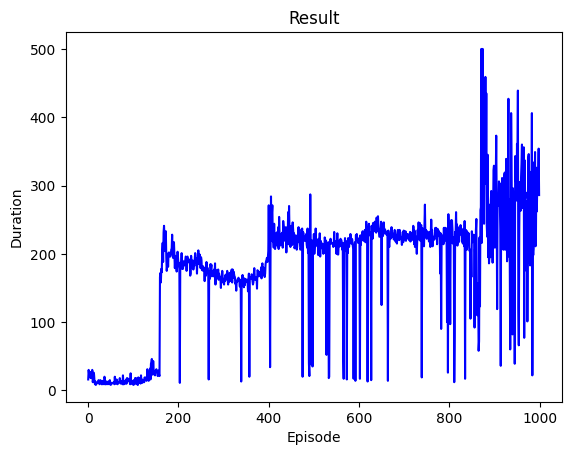

In [ ]:
plt.figure(1)
plt.title('Result')
plt.xlabel('Episode')
plt.ylabel('Duration')
plt.plot(tr_info['total_r'], color='b')
plt.show()

# DDQN

## Configure

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'mps' if torch.mps.is_available() else 'cpu'

In [5]:
test = {
    'memory_size': 1000,
    'batch_size': 128,
    'epsilon_start': 0.9,
    'epsilon_min': 0.05,
    'epsilon_decay': 1000,
    'tau': 0.005,
    'gamma': 0.99,
    'learning_rate': 1e-4
    } 

In [6]:

N_EPOCHS = 1000
BATCH_SIZE = int(test["batch_size"])
EPSILON_START = test["epsilon_start"]
EPSILON_MIN = test["epsilon_min"]
EPSILON_DECAY = int(test["epsilon_decay"])
TAU = test["tau"]
GAMMA = test["gamma"]
LR = test["learning_rate"]
MEM_SIZE = int(test["memory_size"])
MODEL_PATH = './test_model.pth'

## Train

In [7]:
env = gym.make("CartPole-v1")
env.reset()
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n

agent = models.CartPoleDQNAgent(env, state_dim, action_dim, device, 
                            memory_size=int(MEM_SIZE), batch_size=int(BATCH_SIZE), 
                            epsilon_start=EPSILON_START, epsilon_min=EPSILON_MIN, epsilon_decay=EPSILON_DECAY, 
                            tau=TAU, gamma=GAMMA, learning_rate=LR)

In [ ]:
# Train the agent
tr_info = models.train_DDQL(env, agent, device, int(N_EPOCHS))

 94%|█████████▍| 940/1000 [12:46<01:36,  1.61s/it, total_r=500]

## Plot

In [ ]:
plt.figure(1)
plt.title('Result')
plt.xlabel('Episode')
plt.ylabel('Duration')
plt.plot(tr_info['total_r'], color='b')
plt.show()